In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/german-credit-data-with-risk/german_credit_data.csv


In [2]:
data= pd.read_csv('../input/german-credit-data-with-risk/german_credit_data.csv',index_col = 0)
data.fillna(value = 'none',inplace = True)
print(data.head())
df = data.copy()

   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own            none           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little             none           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad  


In [3]:
df.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,none,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,none,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,none,none,9055,36,education,good
6,53,male,2,own,quite rich,none,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,none,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


# Using just dummy variables

In [4]:
df['Sex'].nunique()

2

In [5]:
df['Male'] = pd.get_dummies(df['Sex'],drop_first=True)

In [6]:
df.drop('Sex',axis=1,inplace=True )

In [7]:
df['Housing'].unique()

array(['own', 'free', 'rent'], dtype=object)

In [8]:
df['Housing_own']=pd.get_dummies(df['Housing'],drop_first=True).iloc[:,0]
df['Housing_rent']=pd.get_dummies(df['Housing'],drop_first=True).iloc[:,1]
df.drop('Housing',axis=1,inplace=True)
df.head()


,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Male,Housing_own,Housing_rent
0,67,2,none,little,1169,6,radio/TV,good,1,1,0
1,22,2,little,moderate,5951,48,radio/TV,bad,0,1,0
2,49,1,little,none,2096,12,education,good,1,1,0
3,45,2,little,little,7882,42,furniture/equipment,good,1,0,0
4,53,2,little,little,4870,24,car,bad,1,0,0


In [9]:
pd.get_dummies(df['Saving accounts'],drop_first=False,dummy_na=False)

,little,moderate,none,quite rich,rich
0,0,0,1,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
995,1,0,0,0,0
996,1,0,0,0,0
997,1,0,0,0,0
998,1,0,0,0,0


In [10]:
df['Savings_little']=pd.get_dummies(df['Saving accounts'],drop_first=False,dummy_na=False).iloc[:,0]
df['Savings_moderate']=pd.get_dummies(df['Saving accounts'],drop_first=False,dummy_na=False).iloc[:,1]
df['Savings_quite_rich']=pd.get_dummies(df['Saving accounts'],drop_first=False,dummy_na=False).iloc[:,3]
df['Savings_rich']=pd.get_dummies(df['Saving accounts'],drop_first=False,dummy_na=False).iloc[:,4]

df.drop('Saving accounts',axis=1,inplace=True)
df.head()

,Age,Job,Checking account,Credit amount,Duration,Purpose,Risk,Male,Housing_own,Housing_rent,Savings_little,Savings_moderate,Savings_quite_rich,Savings_rich
0,67,2,little,1169,6,radio/TV,good,1,1,0,0,0,0,0
1,22,2,moderate,5951,48,radio/TV,bad,0,1,0,1,0,0,0
2,49,1,none,2096,12,education,good,1,1,0,1,0,0,0
3,45,2,little,7882,42,furniture/equipment,good,1,0,0,1,0,0,0
4,53,2,little,4870,24,car,bad,1,0,0,1,0,0,0


In [11]:
pd.get_dummies(df['Checking account'],drop_first=False,dummy_na=False)

,little,moderate,none,rich
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
995,0,0,1,0
996,1,0,0,0
997,0,0,1,0
998,1,0,0,0


In [12]:
df['Checking_little']=pd.get_dummies(df['Checking account'],drop_first=False,dummy_na=True).iloc[:,0]
df['Checking_moderate']=pd.get_dummies(df['Checking account'],drop_first=False,dummy_na=True).iloc[:,1]
df['Checking_rich']=pd.get_dummies(df['Checking account'],drop_first=False,dummy_na=True).iloc[:,3]

df.drop('Checking account',axis=1,inplace=True)
df.head()

,Age,Job,Credit amount,Duration,Purpose,Risk,Male,Housing_own,Housing_rent,Savings_little,Savings_moderate,Savings_quite_rich,Savings_rich,Checking_little,Checking_moderate,Checking_rich
0,67,2,1169,6,radio/TV,good,1,1,0,0,0,0,0,1,0,0
1,22,2,5951,48,radio/TV,bad,0,1,0,1,0,0,0,0,1,0
2,49,1,2096,12,education,good,1,1,0,1,0,0,0,0,0,0
3,45,2,7882,42,furniture/equipment,good,1,0,0,1,0,0,0,1,0,0
4,53,2,4870,24,car,bad,1,0,0,1,0,0,0,1,0,0


In [13]:
pd.get_dummies(df['Purpose'],drop_first=False,dummy_na=False)

,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
995,0,0,0,0,1,0,0,0
996,0,1,0,0,0,0,0,0
997,0,0,0,0,0,1,0,0
998,0,0,0,0,0,1,0,0


In [14]:
df['Purpose_business']=pd.get_dummies(df['Purpose'],drop_first=True,dummy_na=True).iloc[:,0]
df['Purpose_car']=pd.get_dummies(df['Purpose'],drop_first=True,dummy_na=True).iloc[:,1]
df['Purpose_domestic']=pd.get_dummies(df['Purpose'],drop_first=True,dummy_na=True).iloc[:,2]
df['Purpose_education']=pd.get_dummies(df['Purpose'],drop_first=True,dummy_na=True).iloc[:,3]
df['Purpose_furniture']=pd.get_dummies(df['Purpose'],drop_first=True,dummy_na=True).iloc[:,4]
df['Purpose_radiotv']=pd.get_dummies(df['Purpose'],drop_first=True,dummy_na=True).iloc[:,5]
df['Purpose_repairs']=pd.get_dummies(df['Purpose'],drop_first=True,dummy_na=True).iloc[:,6]
df['Purpose_vacationothers']=pd.get_dummies(df['Purpose'],drop_first=True,dummy_na=True).iloc[:,6]

df.drop('Purpose',axis=1,inplace=True)
df.head()

,Age,Job,Credit amount,Duration,Risk,Male,Housing_own,Housing_rent,Savings_little,Savings_moderate,...,Checking_moderate,Checking_rich,Purpose_business,Purpose_car,Purpose_domestic,Purpose_education,Purpose_furniture,Purpose_radiotv,Purpose_repairs,Purpose_vacationothers
0,67,2,1169,6,good,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,22,2,5951,48,bad,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,49,1,2096,12,good,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,45,2,7882,42,good,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,53,2,4870,24,bad,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [15]:
df['Risk'].nunique()

2

In [16]:
df['Risk_good'] = pd.get_dummies(df['Risk'],drop_first=True)
df.drop('Risk',axis=1,inplace=True )
df.head()

,Age,Job,Credit amount,Duration,Male,Housing_own,Housing_rent,Savings_little,Savings_moderate,Savings_quite_rich,...,Checking_rich,Purpose_business,Purpose_car,Purpose_domestic,Purpose_education,Purpose_furniture,Purpose_radiotv,Purpose_repairs,Purpose_vacationothers,Risk_good
0,67,2,1169,6,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,22,2,5951,48,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,49,1,2096,12,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,45,2,7882,42,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,53,2,4870,24,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

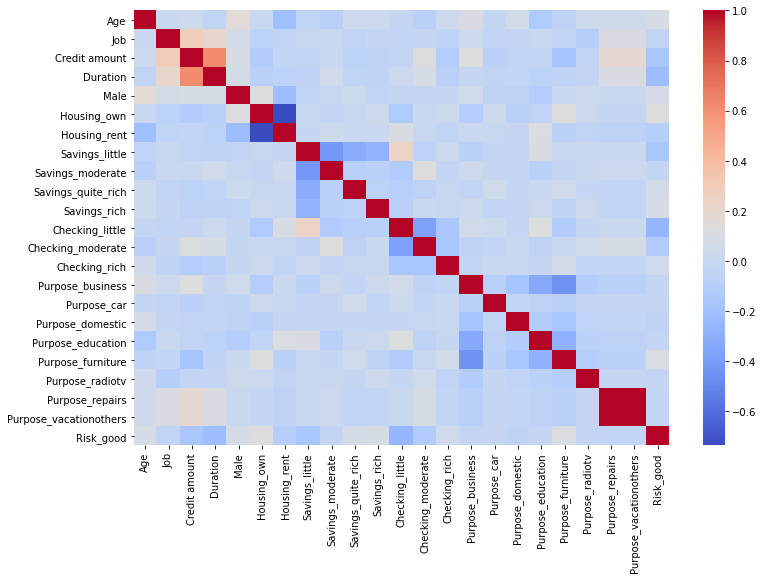

In [18]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),cmap='coolwarm')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [20]:
X = df.drop('Risk_good',axis=1)
y =df['Risk_good']


In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [22]:
scaler = MinMaxScaler(feature_range = (0,1))

In [23]:
scaler.fit(X_train)

MinMaxScaler()

In [24]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.42857143, 1.        , 0.85855191, ..., 0.        , 1.        ,
        1.        ],
       [0.30357143, 0.66666667, 0.04143707, ..., 0.        , 0.        ,
        0.        ],
       [0.10714286, 0.33333333, 0.03251047, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.30357143, 0.66666667, 0.33215781, ..., 0.        , 0.        ,
        0.        ],
       [0.17857143, 0.66666667, 0.02242671, ..., 0.        , 0.        ,
        0.        ],
       [0.42857143, 0.66666667, 0.20834252, ..., 0.        , 0.        ,
        0.        ]])

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logmodel = LogisticRegression(solver= 'liblinear',max_iter = 500)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=500, solver='liblinear')

In [27]:
predictions = logmodel.predict(X_test)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print('Only Dummy var LogModel: \n',classification_report(y_test,predictions))

Only Dummy var LogModel: 
               precision    recall  f1-score   support

           0       0.54      0.34      0.42        90
           1       0.76      0.88      0.81       210

    accuracy                           0.72       300
   macro avg       0.65      0.61      0.62       300
weighted avg       0.69      0.72      0.70       300



In [30]:
print(confusion_matrix(y_test,predictions))

[[ 31  59]
 [ 26 184]]


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc = RandomForestClassifier(n_estimators = 200)

In [33]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [34]:
preds = rfc.predict(X_test)

In [35]:
print('Only Dummy Var RFC: \n',classification_report(y_test,preds))

Only Dummy Var RFC: 
               precision    recall  f1-score   support

           0       0.52      0.31      0.39        90
           1       0.75      0.88      0.81       210

    accuracy                           0.71       300
   macro avg       0.63      0.59      0.60       300
weighted avg       0.68      0.71      0.68       300



In [36]:
print(confusion_matrix(y_test,preds))

[[ 28  62]
 [ 26 184]]


# Using dummy variables and label encoded variables

In [37]:
df2 = data.copy()
df2.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,none,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,none,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [38]:
df2['Male'] = pd.get_dummies(df2['Sex'],drop_first=True)
df2.drop('Sex',axis=1,inplace=True )
df2.head()

,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Male
0,67,2,own,none,little,1169,6,radio/TV,good,1
1,22,2,own,little,moderate,5951,48,radio/TV,bad,0
2,49,1,own,little,none,2096,12,education,good,1
3,45,2,free,little,little,7882,42,furniture/equipment,good,1
4,53,2,free,little,little,4870,24,car,bad,1


In [39]:
df2['Housing_own']=pd.get_dummies(df2['Housing'],drop_first=True).iloc[:,0]
df2['Housing_rent']=pd.get_dummies(df2['Housing'],drop_first=True).iloc[:,1]
df2.drop('Housing',axis=1,inplace=True)
df2.head()


,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Male,Housing_own,Housing_rent
0,67,2,none,little,1169,6,radio/TV,good,1,1,0
1,22,2,little,moderate,5951,48,radio/TV,bad,0,1,0
2,49,1,little,none,2096,12,education,good,1,1,0
3,45,2,little,little,7882,42,furniture/equipment,good,1,0,0
4,53,2,little,little,4870,24,car,bad,1,0,0


In [40]:
df2['Purpose_business']=pd.get_dummies(df2['Purpose'],drop_first=True,dummy_na=True).iloc[:,0]
df2['Purpose_car']=pd.get_dummies(df2['Purpose'],drop_first=True,dummy_na=True).iloc[:,1]
df2['Purpose_domestic']=pd.get_dummies(df2['Purpose'],drop_first=True,dummy_na=True).iloc[:,2]
df2['Purpose_education']=pd.get_dummies(df2['Purpose'],drop_first=True,dummy_na=True).iloc[:,3]
df2['Purpose_furniture']=pd.get_dummies(df2['Purpose'],drop_first=True,dummy_na=True).iloc[:,4]
df2['Purpose_radiotv']=pd.get_dummies(df2['Purpose'],drop_first=True,dummy_na=True).iloc[:,5]
df2['Purpose_repairs']=pd.get_dummies(df2['Purpose'],drop_first=True,dummy_na=True).iloc[:,6]
df2['Purpose_vacationothers']=pd.get_dummies(df2['Purpose'],drop_first=True,dummy_na=True).iloc[:,6]

df2.drop('Purpose',axis=1,inplace=True)
df2.head()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Risk,Male,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic,Purpose_education,Purpose_furniture,Purpose_radiotv,Purpose_repairs,Purpose_vacationothers
0,67,2,none,little,1169,6,good,1,1,0,0,0,0,0,1,0,0,0
1,22,2,little,moderate,5951,48,bad,0,1,0,0,0,0,0,1,0,0,0
2,49,1,little,none,2096,12,good,1,1,0,0,0,1,0,0,0,0,0
3,45,2,little,little,7882,42,good,1,0,0,0,0,0,1,0,0,0,0
4,53,2,little,little,4870,24,bad,1,0,0,1,0,0,0,0,0,0,0


In [41]:
df2['Risk_good'] = pd.get_dummies(df2['Risk'],drop_first=True)
df2.drop('Risk',axis=1,inplace=True )
df2.head()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Male,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic,Purpose_education,Purpose_furniture,Purpose_radiotv,Purpose_repairs,Purpose_vacationothers,Risk_good
0,67,2,none,little,1169,6,1,1,0,0,0,0,0,1,0,0,0,1
1,22,2,little,moderate,5951,48,0,1,0,0,0,0,0,1,0,0,0,0
2,49,1,little,none,2096,12,1,1,0,0,0,1,0,0,0,0,0,1
3,45,2,little,little,7882,42,1,0,0,0,0,0,1,0,0,0,0,1
4,53,2,little,little,4870,24,1,0,0,1,0,0,0,0,0,0,0,0


In [42]:
#savings_order = [x for x in df2['Saving accounts'].unique()]
savings_order = ['none', 'little','moderate', 'quite rich', 'rich']

checking_order =['none','little','moderate','rich']


In [43]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [44]:
def ordered_labels(df,col,order):
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.reorder_categories(order,ordered=True)
    df[col] = df[col].cat.codes.astype(int)

In [45]:
mapings=[]
ordered_labels(df2,'Saving accounts',savings_order)
ordered_labels(df2,'Checking account',checking_order)


In [46]:
df2.head()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Male,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic,Purpose_education,Purpose_furniture,Purpose_radiotv,Purpose_repairs,Purpose_vacationothers,Risk_good
0,67,2,0,1,1169,6,1,1,0,0,0,0,0,1,0,0,0,1
1,22,2,1,2,5951,48,0,1,0,0,0,0,0,1,0,0,0,0
2,49,1,1,0,2096,12,1,1,0,0,0,1,0,0,0,0,0,1
3,45,2,1,1,7882,42,1,0,0,0,0,0,1,0,0,0,0,1
4,53,2,1,1,4870,24,1,0,0,1,0,0,0,0,0,0,0,0


In [47]:
X2 = df2.drop('Risk_good',axis=1)
y2 =df2['Risk_good']

X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size=0.3)

scaler2 = MinMaxScaler(feature_range = (0,1))

scaler2.fit(X_train2)
X_train2 = scaler2.transform(X_train2)
X_test2 = scaler2.transform(X_test2)
X_train2

array([[0.14285714, 1.        , 0.25      , ..., 0.        , 1.        ,
        1.        ],
       [0.08928571, 0.66666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.82142857, 0.66666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.19642857, 1.        , 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [0.14285714, 0.66666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.23214286, 0.33333333, 0.25      , ..., 0.        , 0.        ,
        0.        ]])

In [48]:
logmodel2 = LogisticRegression(solver= 'liblinear',max_iter = 200)
logmodel2.fit(X_train2,y_train2)

LogisticRegression(max_iter=200, solver='liblinear')

In [49]:
predictions = logmodel2.predict(X_test2)
print('Dummy & LE var LogModel: \n',classification_report(y_test2,predictions))

Dummy & LE var LogModel: 
               precision    recall  f1-score   support

           0       0.59      0.22      0.32        90
           1       0.74      0.93      0.82       210

    accuracy                           0.72       300
   macro avg       0.66      0.58      0.57       300
weighted avg       0.69      0.72      0.67       300



In [50]:
rfc2 = RandomForestClassifier(n_estimators = 200)
rfc2.fit(X_train2,y_train2)

RandomForestClassifier(n_estimators=200)

In [51]:
preds = rfc2.predict(X_test2)

In [52]:
print('Dummy & LE var RFC: \n',classification_report(y_test2,preds))

Dummy & LE var RFC: 
               precision    recall  f1-score   support

           0       0.64      0.43      0.52        90
           1       0.79      0.90      0.84       210

    accuracy                           0.76       300
   macro avg       0.71      0.66      0.68       300
weighted avg       0.74      0.76      0.74       300



# Using Grid Search, dummy and encoded variables

In [53]:
def modelEvaluate(model,X_test,y_test,model_name):
    preds = model.predict(X_test)
    print(model_name,classification_report(y_test,preds))

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
parametros = {'n_estimators':[20,50,100,150,200],
                  'criterion':['gini','entropy'],
                  'min_samples_split':[2,3,4],
             'max_features':[1,3,5,7,9,11,13,15]}

In [56]:
rfc3 = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rfc3,param_grid=parametros,cv = 5)
grid_search.fit(X_train2, y_train2)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [1, 3, 5, 7, 9, 11, 13, 15],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [20, 50, 100, 150, 200]})

In [57]:
melhores_param = grid_search.best_params_
print(melhores_param)

{'criterion': 'gini', 'max_features': 9, 'min_samples_split': 3, 'n_estimators': 150}


In [58]:
rfc3 = RandomForestClassifier(n_estimators = melhores_param['n_estimators'], criterion = melhores_param['criterion'], min_samples_split = melhores_param['min_samples_split'],max_features=melhores_param['max_features'])
rfc3.fit(X_train2, y_train2)

RandomForestClassifier(max_features=9, min_samples_split=3, n_estimators=150)

In [59]:
modelEvaluate(rfc3,X_test2,y_test2,'GridSearch,Dummy & LE var RFC: \n')

GridSearch,Dummy & LE var RFC: 
               precision    recall  f1-score   support

           0       0.69      0.51      0.59        90
           1       0.81      0.90      0.85       210

    accuracy                           0.78       300
   macro avg       0.75      0.71      0.72       300
weighted avg       0.77      0.78      0.77       300



# Selecting Variables and Grid Search

<AxesSubplot:>

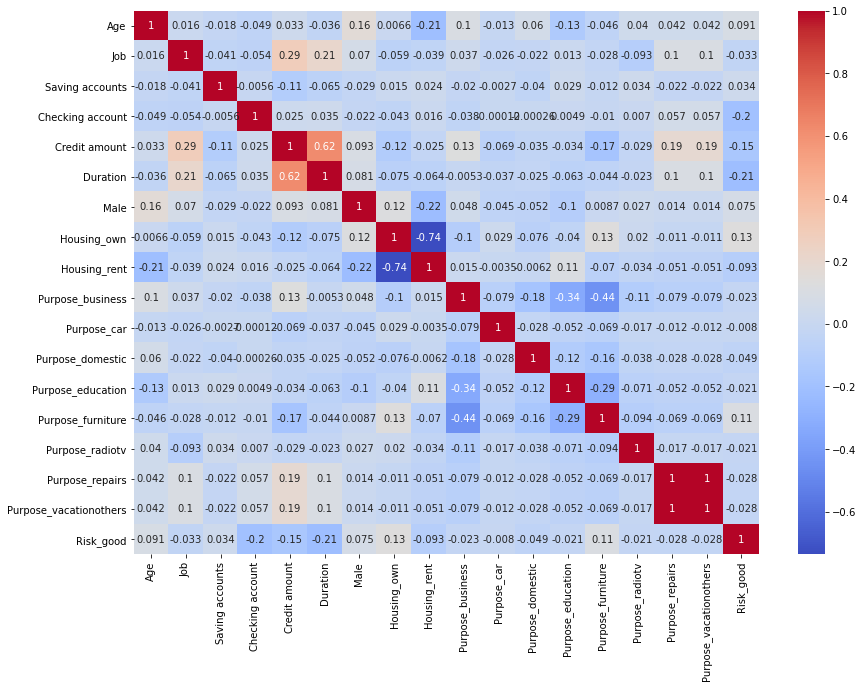

In [60]:
plt.figure(figsize = (14,10))
sns.heatmap(df2.corr(),cmap='coolwarm',annot=True)

In [61]:
higher_corr = ['Age','Male','Housing_own','Housing_rent','Checking account','Credit amount','Duration','Risk_good']

In [62]:
df3 = df2[higher_corr].copy()

In [63]:
df3.head()

,Age,Male,Housing_own,Housing_rent,Checking account,Credit amount,Duration,Risk_good
0,67,1,1,0,1,1169,6,1
1,22,0,1,0,2,5951,48,0
2,49,1,1,0,0,2096,12,1
3,45,1,0,0,1,7882,42,1
4,53,1,0,0,1,4870,24,0


In [64]:
X3 = df3.drop('Risk_good',axis=1)
y3 =df3['Risk_good']

X_train3,X_test3,y_train3,y_test3 = train_test_split(X3,y3,test_size=0.3)

scaler3 = MinMaxScaler(feature_range = (0,1))

scaler3.fit(X_train3)
X_train3 = scaler3.transform(X_train3)
X_test3 = scaler3.transform(X_test3)
X_train3

array([[0.07142857, 0.        , 1.        , ..., 0.66666667, 0.18284362,
        0.14285714],
       [0.16071429, 0.        , 0.        , ..., 0.66666667, 0.2125564 ,
        0.35714286],
       [0.25      , 0.        , 0.        , ..., 0.        , 0.10652581,
        0.19642857],
       ...,
       [0.125     , 0.        , 0.        , ..., 0.66666667, 0.08407615,
        0.19642857],
       [0.17857143, 1.        , 0.        , ..., 0.66666667, 0.48332783,
        0.57142857],
       [0.21428571, 1.        , 1.        , ..., 0.        , 0.11863101,
        0.08928571]])

In [65]:
parametros = {'n_estimators':[20,50,100,150,200],
                  'criterion':['gini','entropy'],
                  'min_samples_split':[2,3,4],
             'max_features':[1,2,3,4]}

In [66]:
rfc4 = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rfc4,param_grid=parametros,cv = 5)
grid_search.fit(X_train3, y_train3)
melhores_param = grid_search.best_params_
print(melhores_param)
rfc4 = RandomForestClassifier(n_estimators = melhores_param['n_estimators'], criterion = melhores_param['criterion'], min_samples_split = melhores_param['min_samples_split'],max_features=melhores_param['max_features'])
rfc4.fit(X_train3, y_train3)

{'criterion': 'gini', 'max_features': 3, 'min_samples_split': 3, 'n_estimators': 200}


RandomForestClassifier(max_features=3, min_samples_split=3, n_estimators=200)

In [67]:
modelEvaluate(rfc4,X_test3,y_test3,'GridSearch,Dummy & LE selected Car RFC: \n')

GridSearch,Dummy & LE selected Car RFC: 
               precision    recall  f1-score   support

           0       0.51      0.40      0.45        88
           1       0.77      0.84      0.81       212

    accuracy                           0.71       300
   macro avg       0.64      0.62      0.63       300
weighted avg       0.70      0.71      0.70       300

